# Facial Keypoint Detection

---

In this project, I've built an end-to-end facial keypoint recognition system. Facial keypoints include points around the eyes, nose, and mouth on any face and are used in many applications, from facial tracking to emotion recognition. 

<img src="images/obamas_with_keypoints.png" width=1000 height=1000/>

There are three main parts to this project:

**Part 1** : Investigating OpenCV, pre-processing, and face detection

**Part 2** : Training a Convolutional Neural Network (CNN) to detect facial keypoints

**Part 3** : Putting parts 1 and 2 together to identify facial keypoints on any image!

---

### Import Resources 

In the next python cell, I load in the required libraries for this section of the project.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import cv2                     # OpenCV library for computer vision
from PIL import Image
import time 

---
## Detect Faces Using a Haar Cascade Classifier

I'll be using OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  I have downloaded one of these detectors and stored it in the `detector_architectures` directory.

Let's load in and display a test image for performing face detection.

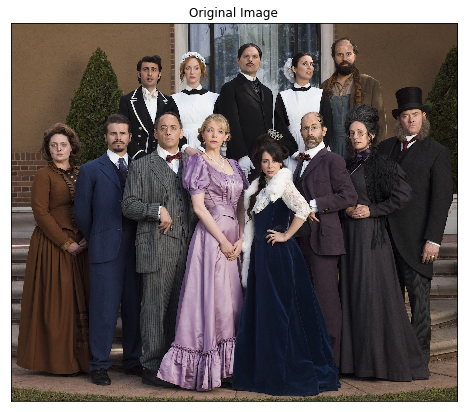

In [24]:
# Load in color image
image = cv2.imread('images/test_image_1.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot our image using subplots to specify a size and title
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

There are a lot of people - and faces - in this picture.  13 faces to be exact!  In the next code cell, we demonstrate how to use a Haar Cascade classifier to detect all the faces in this test image.

This face detector uses information about patterns of intensity in an image to reliably detect faces under varying light conditions. So, to use this face detector, we'll first convert the image from color to grayscale. 

Then, we load in the fully trained architecture of the face detector -- found in the file *haarcascade_frontalface_default.xml* - and use it on our image to find faces! 

To learn more about the parameters of the detector see [this post](https://stackoverflow.com/questions/20801015/recommended-values-for-opencv-detectmultiscale-parameters).

In [25]:
def detect_faces(image):

    # Convert the RGB  image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Extract the pre-trained face detector from an xml file
    face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

    # Detect the faces in image
    faces = face_cascade.detectMultiScale(gray, 1.25, 6)

    # Print the number of faces detected in the image
    print('Number of faces detected:', len(faces))

    # Make a copy of the orginal image to draw face detections on
    image_with_detections = np.copy(image)

    # Get the bounding box for each detected face
    for (x,y,w,h) in faces:
        # Add a red bounding box to the detections image
        cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
        
    return image_with_detections, faces

Test the face detection function

Number of faces detected: 13


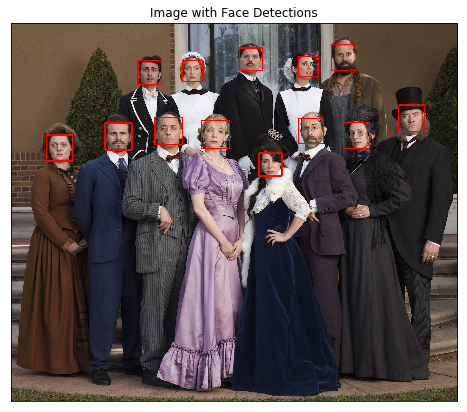

In [27]:
image_with_detections, _ = detect_faces(image)
    
# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detections')
ax1.imshow(image_with_detections)

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

---
## Add Eye Detections

There are other pre-trained detectors available that use a Haar Cascade Classifier - including full human body detectors, license plate detectors, and more.  [A full list of the pre-trained architectures can be found here](https://github.com/opencv/opencv/tree/master/data/haarcascades). 

To test your eye detector, we'll first read in a new test image with just a single face.

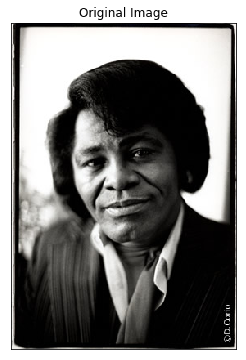

In [5]:
# Load in color image for face detection
image = cv2.imread('images/james.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the RGB image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

Perform Face Detection and Eye Detection within the detected faces

In [6]:
def detect_faces_eyes(image):
    
    # Convert the RGB image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Extract the pre-trained face detector from an xml file
    face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

    # Detect the faces in image
    faces = face_cascade.detectMultiScale(gray, 1.25, 6)

    # Print the number of faces detected in the image
    print('Number of faces detected:', len(faces))

    # Make a copy of the original image to plot rectangle detections
    image_with_detections = np.copy(image)   

    # Loop over the detections and draw their corresponding face detection boxes
    for (x,y,w,h) in faces:
        cv2.rectangle(image_with_detections, (x,y), (x+w,y+h),(255,0,0), 3)  

    ## Add eye detection, using haarcascade_eye.xml, to the current face detector algorithm
    eye_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')

    # Detect eyes in each detected face
    for (x_face,y_face,w_face,h_face) in faces:
        gray_face = gray[y_face:y_face+h_face,x_face:x_face+w_face]
        eyes = eye_cascade.detectMultiScale(gray_face)

        ## Loop over the eye detections and draw their corresponding boxes in green on image_with_detections
        for (x_eye,y_eye,w_eye,h_eye) in eyes:
            cv2.rectangle(image_with_detections, (x_face+x_eye,y_face+y_eye), (x_face+x_eye+w_eye,y_face+y_eye+h_eye),(0,255,0), 3)
            
    return image_with_detections

Test the Face and Eyes detection function

Number of faces detected: 1


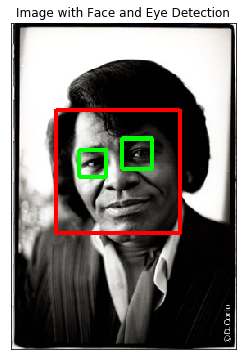

In [7]:
image_with_detections = detect_faces_eyes(image)

# Plot the image with both faces and eyes detected
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face and Eye Detection')
ax1.imshow(image_with_detections)

---
## De-noise an Image for Face Detection on noisy images

In the next cell, we create an artificial noisy version of the previous multi-face image.  This is a little exaggerated - we don't typically get images that are this noisy - but [image noise](https://digital-photography-school.com/how-to-avoid-and-reduce-noise-in-your-images/), or 'grainy-ness' in a digitial image - is a fairly common phenomenon.

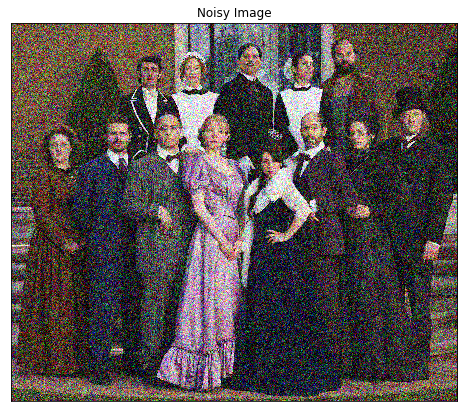

In [10]:
# Load in the multi-face test image again
image = cv2.imread('images/test_image_1.jpg')

# Convert the image copy to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Make an array copy of this image
image_with_noise = np.asarray(image)

# Create noise - here we add noise sampled randomly from a Gaussian distribution: a common model for noise
noise_level = 55
noise = np.random.randn(image.shape[0],image.shape[1],image.shape[2])*noise_level

# Add this noise to the array image copy
image_with_noise = image_with_noise + noise

# Convert back to uint8 format
image_with_noise = np.asarray([np.uint8(np.clip(i,0,255)) for i in image_with_noise])

# Plot our noisy image
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Noisy Image')
ax1.imshow(image_with_noise)

In the context of face detection, the problem with an image like this is that  - due to noise - we may miss some faces or get false detections.  

In the next cell we apply the same trained OpenCV detector with the same settings as before, to see what sort of detections we get.

Number of faces detected: 12


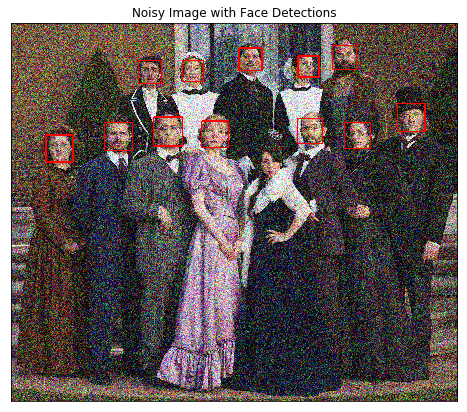

In [11]:
image_with_detections, _ = detect_faces(image_with_noise)

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Noisy Image with Face Detections')
ax1.imshow(image_with_detections)

With this added noise we now miss one of the faces!

We'll de-noise the image using OpenCV's built in color image de-noising functionality called ```fastNlMeansDenoisingColored``` -  so that all the faces in the image are properly detected.  

In [12]:
denoised_image = cv2.fastNlMeansDenoisingColored(image_with_noise,None,15,15,7,41)

Number of faces detected: 13


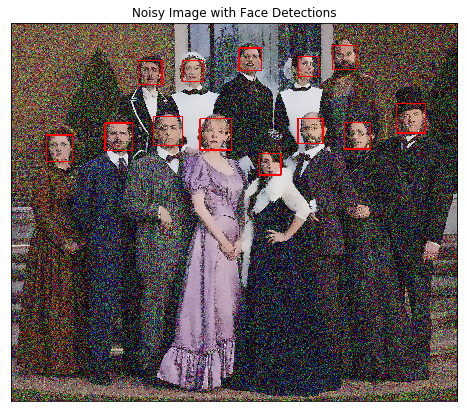

In [13]:
denoised_image_with_detections, _ = detect_faces(denoised_image)

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Noisy Image with Face Detections')
ax1.imshow(denoised_image_with_detections)

All faces are now detected!

---

## Blur an Image and Perform Edge Detection

In the cell below we load in a test image, then apply *Canny edge detection* on it.  The original image is shown on the left panel of the figure, while the edge-detected version of the image is shown on the right.  Notice how the result looks very busy - there are too many little details preserved in the image before it is sent to the edge detector.  When applied in computer vision applications, edge detection should preserve *global* structure; doing away with local structures that don't help describe what objects are in the image.

In [14]:
def detect_edge(image):
    
    # Convert to RGB colorspace
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  

    # Perform Canny edge detection
    edges = cv2.Canny(gray,100,200)

    # Dilate the image to amplify edges
    edges = cv2.dilate(edges, None)
    
    return edges

Test the edge detection on original image

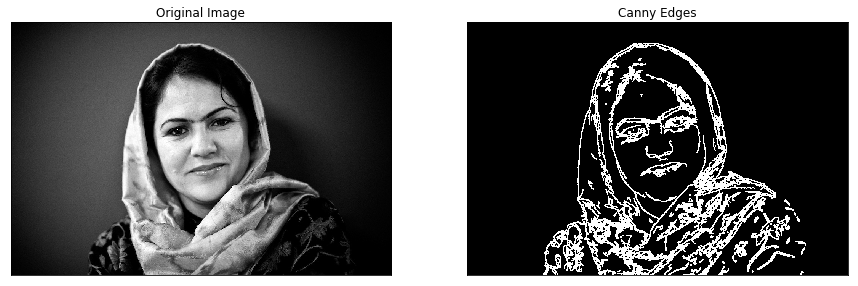

In [15]:
# Load in the image
image = cv2.imread('images/fawzia.jpg')

# Detect edges
edges = detect_edge(image)

# Plot the RGB and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges')
ax2.imshow(edges, cmap='gray')

Without first blurring the image, and removing small, local structures, a lot of irrelevant edge content gets picked up and amplified by the detector (as shown in the right panel above). 

In the next cell, we repeat this experiment - blurring the image first to remove these local structures, so that only the important boudnary details remain in the edge-detected image.

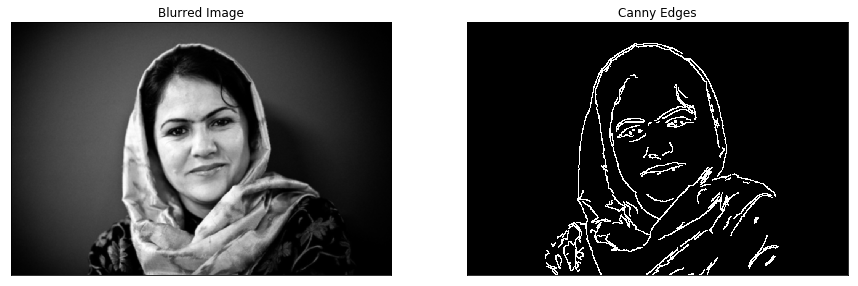

In [16]:
# Blur the test image using OpenCV's filter2d functionality
kernel = np.ones((4,4),np.float32)/16
blurred = cv2.filter2D(image,-1,kernel)

# Perform edge detection on blurred image
edges = detect_edge(blurred)

# Plot the blurred and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Blurred Image')
ax1.imshow(blurred)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges')
ax2.imshow(edges, cmap='gray')

---

## Hide the Identity of an Individual, using Face Detection

Let's load a test image containing a face

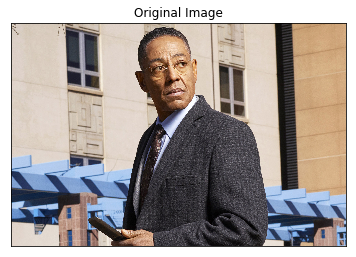

In [17]:
# Load in the image
image = cv2.imread('images/gus.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(image)

Detect the face in this image, and then blur it out

In [18]:
def blur_faces(image):
    # Convert the RGB  image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Extract the pre-trained face detector from an xml file
    face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

    # Detect the faces in image
    faces = face_cascade.detectMultiScale(gray, 1.4, 6)

    # Blur the bounding box around each detected face
    kernel = np.ones((100,100),np.float32)/10000
    for (x,y,w,h) in faces:
        image[y:y+h,x:x+w] = cv2.filter2D(image[y:y+h,x:x+w],-1,kernel)
        
    return image

Test bluring the detected faces on the test image

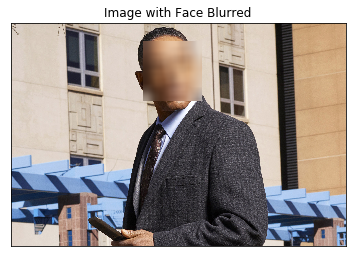

In [19]:
blurred_image = blur_faces(image)

# Display the image with the detections blurred
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Blurred')
ax1.imshow(blurred_image)

---

## Create a Convolutional Neural Network to Detect Facial Keypoints

<img src="images/keypoints_test_results.png" width=400 height=300/>

Facial keypoints (also called facial landmarks) are the small blue-green dots shown on each of the faces in the image above - there are 15 keypoints marked in each image.  They mark important areas of the face - the eyes, corners of the mouth, the nose, etc.  Facial keypoints can be used in a variety of machine learning applications from face and emotion recognition to commercial applications like the image filters popularized by Snapchat.

<img src="images/obamas_with_shades.png" width=1000 height=1000/>

### Load Training and Testing Datasets

We will be using [this dataset from Kaggle](https://www.kaggle.com/c/facial-keypoints-detection/data), placed in the `data` directory. The training dataset contains several thousand $96 \times 96$ grayscale images of cropped human faces, along with each face's 15 corresponding facial keypoints (also called landmarks) that have been placed by hand, and recorded in $(x, y)$ coordinates.  

The `load_data` function is in the included `utils.py` file.

In [4]:
from utils import *

# Load training set
X_train, y_train = load_data()
print("X_train.shape == {}".format(X_train.shape))
print("y_train.shape == {}; y_train.min == {:.3f}; y_train.max == {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max()))

# Load testing set
X_test, _ = load_data(test=True)
print("X_test.shape == {}".format(X_test.shape))

Using TensorFlow backend.


X_train.shape == (2140, 96, 96, 1)
y_train.shape == (2140, 30); y_train.min == -0.920; y_train.max == 0.996
X_test.shape == (1783, 96, 96, 1)


### Visualize the Training Data

In [38]:
def plot_data(img, landmarks, axis):
    """
    Plot image (img), along with normalized facial keypoints (landmarks)
    """
    axis.imshow(np.squeeze(img), cmap='gray') # plot the image
    landmarks = landmarks * 48 + 48 # undo the normalization
    # Plot the keypoints
    axis.scatter(landmarks[0::2], 
        landmarks[1::2], 
        marker='o', 
        c='c', 
        s=40)

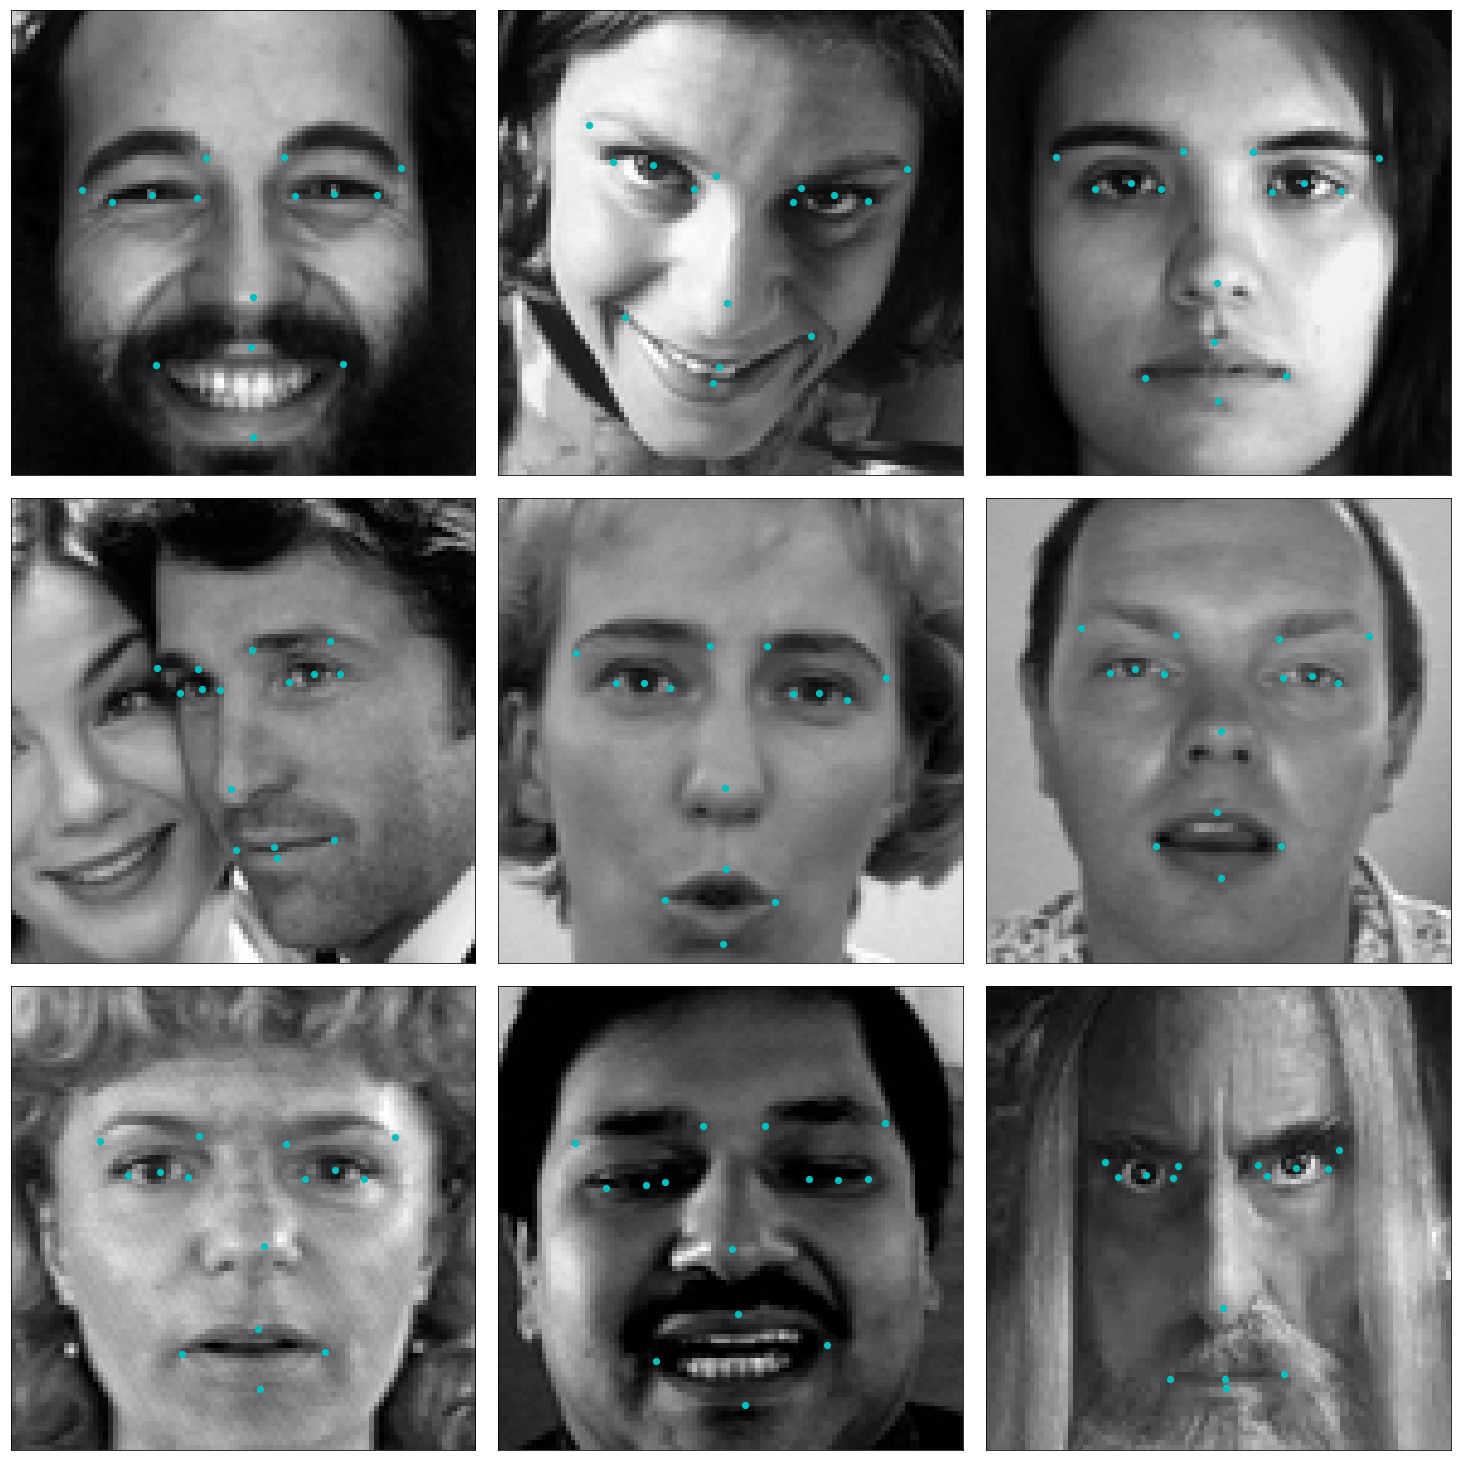

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_train[i], y_train[i], ax)

For each training image, there are two landmarks per eyebrow (**four** total), three per eye (**six** total), **four** for the mouth, and **one** for the tip of the nose.  

### Specify the CNN Architecture

In this section, we specify a neural network for predicting the locations of facial keypoints. The network accepts a $96 \times 96$ grayscale image as input, and outputs a vector with 30 entries, corresponding to the predicted (horizontal and vertical) locations of 15 facial keypoints.  

In [32]:
# Import deep learning resources from Keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.layers import Flatten, Dense


# Specify a CNN architecture
def build_model():
    model = None
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', 
                            input_shape=(96, 96, 1)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Flatten())
    model.add(Dropout(0.25))
    model.add(Dense(1000))
    model.add(Dropout(0.25))
    model.add(Dense(150))
    model.add(Dense(30))
    
    return model

model = build_model()

# Summarize the model
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       32896     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
__________

### Compile and Train the Model

Let's experiment with the choice of [optimizer](https://keras.io/optimizers/) by training with different optimizers.

In [44]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

optimizers = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

for optimizer in optimizers:
    print("\n\noptimizer:", optimizer)
    model = build_model()
    
    # Compile the model
    model.compile(loss='mse', optimizer=optimizer)

    # Train the model
    model.fit(X_train, y_train, nb_epoch=15, validation_split=0.2)



optimizer: SGD


/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1712 samples, validate on 428 samples
Epoch 1/15
1712/1712 [==============================] - 2s - loss: 0.0437 - val_loss: 0.0105
Epoch 2/15
1712/1712 [==============================] - 2s - loss: 0.0229 - val_loss: 0.0100
Epoch 3/15
1712/1712 [==============================] - 2s - loss: 0.0202 - val_loss: 0.0094
Epoch 4/15
1712/1712 [==============================] - 2s - loss: 0.0183 - val_loss: 0.0087
Epoch 5/15
1712/1712 [==============================] - 2s - loss: 0.0166 - val_loss: 0.0083
Epoch 6/15
1712/1712 [==============================] - 2s - loss: 0.0154 - val_loss: 0.0079
Epoch 7/15
1712/1712 [==============================] - 2s - loss: 0.0144 - val_loss: 0.0075
Epoch 8/15
1712/1712 [==============================] - 2s - loss: 0.0136 - val_loss: 0.0071
Epoch 9/15
1712/1712 [==============================] - 2s - loss: 0.0128 - val_loss: 0.0068
Epoch 10/15
1712/1712 [==============================] - 2s - loss: 0.0122 - val_loss: 0.0066
Epoch 11/15
1712/1712 

The Adam optimizer seems to train the model with the lowest validation loss (0.0013 after 15 epochs)

Let's train the model using the best optimizer (Adam), and save it

In [20]:
from keras.callbacks import ModelCheckpoint

In [49]:
# Compile the model
model.compile(loss='mse', optimizer='Adam')

# Train the model
checkpointer = ModelCheckpoint(filepath='facial_keypoint_model.h5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, nb_epoch=25, validation_split=0.2, callbacks=[checkpointer])

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1712 samples, validate on 428 samples
Epoch 1/25
1712/1712 [==============================] - 5s - loss: 0.0012 - val_loss: 0.0016
Epoch 2/25
1712/1712 [==============================] - 3s - loss: 0.0011 - val_loss: 0.0017
Epoch 3/25
1712/1712 [==============================] - 4s - loss: 0.0011 - val_loss: 0.0016
Epoch 4/25
1712/1712 [==============================] - 4s - loss: 0.0010 - val_loss: 0.0015
Epoch 5/25
1712/1712 [==============================] - 4s - loss: 9.7022e-04 - val_loss: 0.0015
Epoch 6/25
1712/1712 [==============================] - 3s - loss: 9.9764e-04 - val_loss: 0.0015
Epoch 7/25
1712/1712 [==============================] - 3s - loss: 9.3926e-04 - val_loss: 0.0016
Epoch 8/25
1712/1712 [==============================] - 3s - loss: 9.2106e-04 - val_loss: 0.0015
Epoch 9/25
1712/1712 [==============================] - 4s - loss: 9.3957e-04 - val_loss: 0.0014
Epoch 10/25
1712/1712 [==============================] - 3s - loss: 9.3405e-04 - val_loss: 0.001

Load model, if already trained

In [33]:
model.load_weights('facial_keypoint_model.h5')

###  Visualize the Loss and Test Predictions

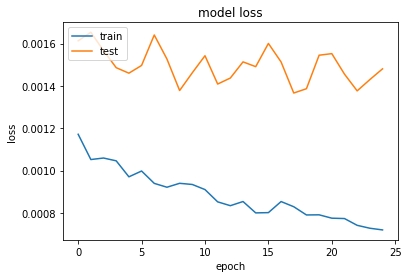

In [52]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Visualize a Subset of the Test Predictions

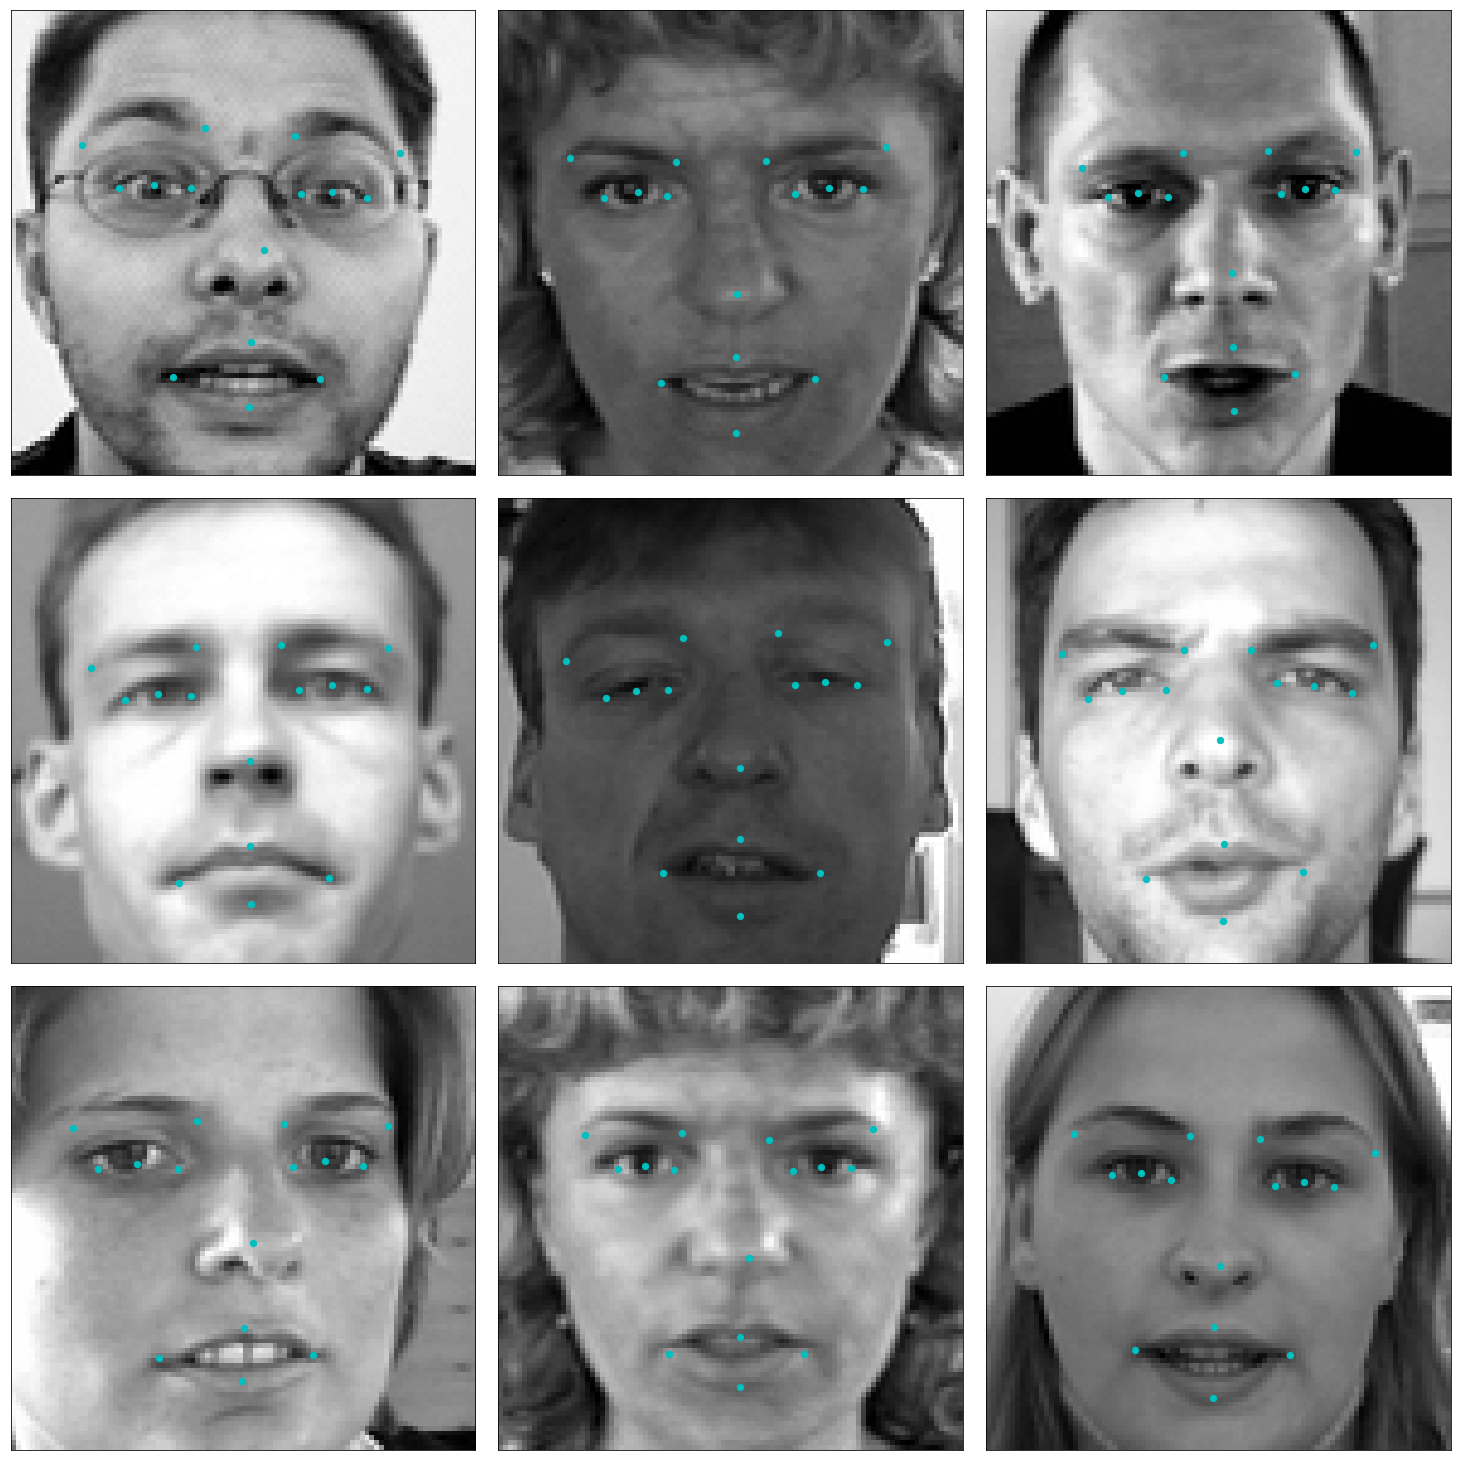

In [8]:
y_test = model.predict(X_test)

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_test[i], y_test[i], ax)

---
## Complete the Facial Keypoints Detection pipeline

- Detect and crop the face contained in the image.
- Detect the facial keypoints in the cropped image.
- Overlay the facial keypoints in the original image.

#### Load original image

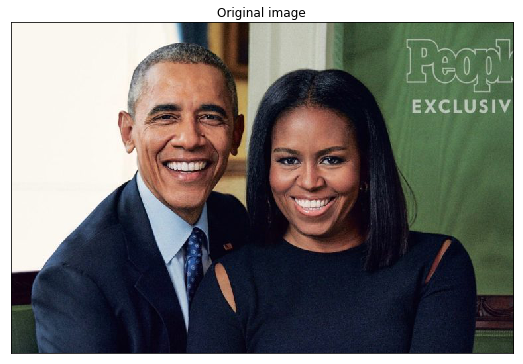

In [56]:
# Load in color image for face detection
image = cv2.imread('images/obamas4.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original image')
ax1.imshow(image)

#### Apply Face Detection

Number of faces detected: 2


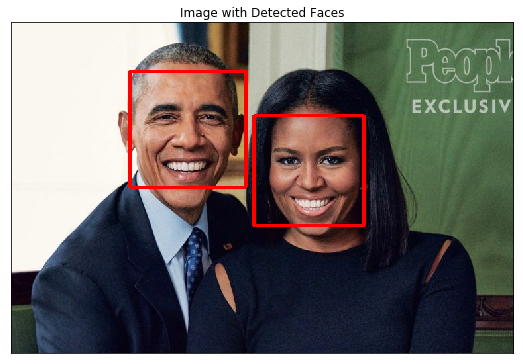

In [57]:
image_with_detections, faces = detect_faces(image)
    
# plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Image with Detected Faces')
ax1.imshow(image_with_detections)

#### Locate Facial Keypoints in the detected faces

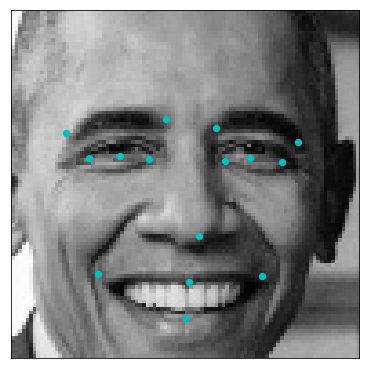

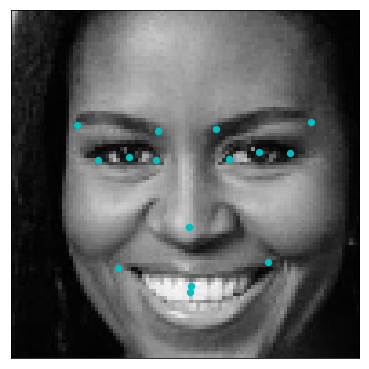

In [58]:
for (x,y,w,h) in faces:
    
    # convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # crop face
    gray_face = gray[y:y+h,x:x+w]

    # preprocess face pixels
    gray_face_small = cv2.resize(gray_face,(96,96))
    X = gray_face_small / 255.  # scale pixel values to [0, 1]
    X = X.reshape(-1, 96, 96, 1) # return each images as 96 x 96 x 1
    
    # run Neural Network to locate facial keypoints
    keypoints = model.predict(X)
    keypoints = keypoints.reshape(30)
    
    # Plot facial keypoints
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    ax = fig.add_subplot(3, 3, 1, xticks=[], yticks=[])
    plot_data(gray_face_small, keypoints, ax)

#### Overlay the facial keypoints in the original image

In [59]:
def detect_facial_keypoints(image):

    fig = plt.figure(figsize = (15,15))
    ax1 = fig.add_subplot(111)
    ax1.set_xticks([])
    ax1.set_yticks([])

    # Convert the image to RGB colorspace
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply face detection
    image_with_detections, faces = detect_faces(image)

    # Detect facial keypoints in each detected face
    for (x,y,w,h) in faces:

        # convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        # crop face
        gray_face = gray[y:y+h,x:x+w]

        # preprocess face pixels
        gray_face_small = cv2.resize(gray_face,(96,96))
        X = gray_face_small / 255.  # scale pixel values to [0, 1]
        X = X.reshape(-1, 96, 96, 1) # return each images as 96 x 96 x 1

        # run Neural Network to locate facial keypoints
        keypoints = model.predict(X)
        keypoints = keypoints.reshape(30)

        # modify plot_data() code to scale and translate the keypoints position
        ax1.scatter(keypoints[0::2] * w/2 + w/2 + x, 
            keypoints[1::2]* h/2 + h/2 + y, 
            marker='o', 
            c='c', 
            s=20)

    ax1.set_title('Image with Facial Keypoints Detection')
    ax1.imshow(image_with_detections)

Test facial keypoints detection pipeline on test image

Number of faces detected: 2


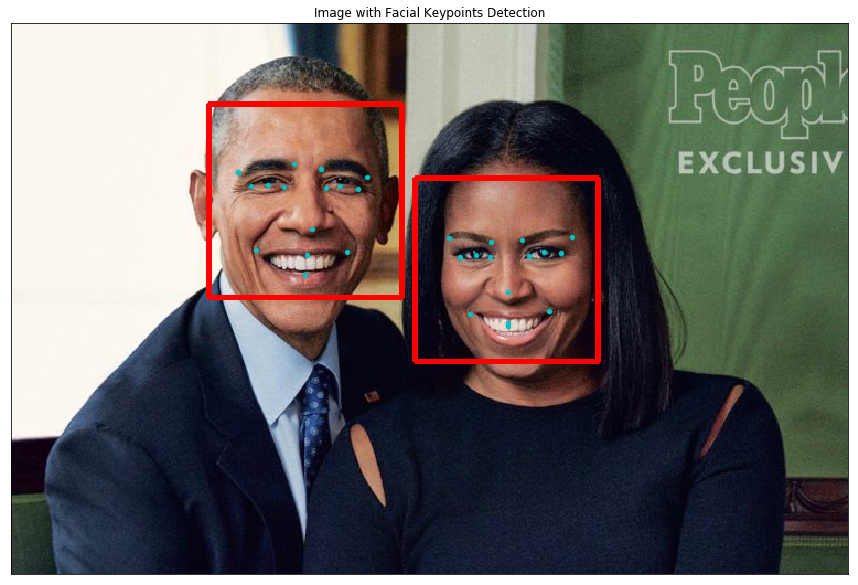

In [62]:
# Load in color image for face detection
image = cv2.imread('images/obamas4.jpg')

# Perform facial keypoints detection
detect_facial_keypoints(image)

### (Optional) Further Directions - add a filter using facial keypoints

Using your freshly minted facial keypoint detector pipeline you can now do things like add fun filters to a person's face automatically.  In this optional exercise you can play around with adding sunglasses automatically to each individual's face in an image as shown in a demonstration image below.

<img src="images/obamas_with_shades.png" width=1000 height=1000/>

To produce this effect an image of a pair of sunglasses shown in the Python cell below.

In [ ]:
# Load in sunglasses image - note the usage of the special option
# cv2.IMREAD_UNCHANGED, this option is used because the sunglasses 
# image has a 4th channel that allows us to control how transparent each pixel in the image is
sunglasses = cv2.imread("images/sunglasses_4.png", cv2.IMREAD_UNCHANGED)

# Plot the image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(sunglasses)
ax1.axis('off');

This image is placed over each individual's face using the detected eye points to determine the location of the sunglasses, and eyebrow points to determine the size that the sunglasses should be for each person (one could also use the nose point to determine this).  

Notice that this image actually has *4 channels*, not just 3. 

In [ ]:
# Print out the shape of the sunglasses image
print ('The sunglasses image has shape: ' + str(np.shape(sunglasses)))

It has the usual red, blue, and green channels any color image has, with the 4th channel representing the transparency level of each pixel in the image.  Here's how the transparency channel works: the lower the value, the more transparent the pixel will become.  The lower bound (completely transparent) is zero here, so any pixels set to 0 will not be seen. 

This is how we can place this image of sunglasses on someone's face and still see the area around of their face where the sunglasses lie - because these pixels in the sunglasses image have been made completely transparent.

Lets check out the alpha channel of our sunglasses image in the next Python cell.  Note because many of the pixels near the boundary are transparent we'll need to explicitly print out non-zero values if we want to see them. 

In [ ]:
# Print out the sunglasses transparency (alpha) channel
alpha_channel = sunglasses[:,:,3]
print ('the alpha channel here looks like')
print (alpha_channel)

# Just to double check that there are indeed non-zero values
# Let's find and print out every value greater than zero
values = np.where(alpha_channel != 0)
print ('\n the non-zero values of the alpha channel look like')
print (values)

This means that when we place this sunglasses image on top of another image, we can use the transparency channel as a filter to tell us which pixels to overlay on a new image (only the non-transparent ones with values greater than zero).

One last thing: it's helpful to understand which keypoint belongs to the eyes, mouth, etc. So, in the image below, we also display the index of each facial keypoint directly on the image so that you can tell which keypoints are for the eyes, eyebrows, etc.

<img src="images/obamas_points_numbered.png" width=500 height=500/>

With this information, you're well on your way to completing this filtering task!  See if you can place the sunglasses automatically on the individuals in the image loaded in / shown in the next Python cell.

In [ ]:
# Load in color image for face detection
image = cv2.imread('images/obamas4.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Plot the image
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(image)

In [ ]:
## (Optional) TODO: Use the face detection code we saw in Section 1 with your trained conv-net to put
## sunglasses on the individuals in our test image

